# SparseEdges tests

## A series of tests for the SparseEdges package


Table of content

* [What is the SparseEdges package?](#What-is-the-SparseEdges-package?) 
* [Installing](#Installing) 
* [testing one step](#testing-one-step)


In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

In [2]:
%cd -q ../probe

In [3]:
from NeuroTools.parameters import ParameterSet
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges

In [4]:
#! defining framework
#!-------------------
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 4
mp.pe.MP_alpha=1.
mp.pe.do_whitening = False

## Defining units, axis and conventions

cardinal points in X, Y (clockwise):  E (=right=3 o'clock=horizontal), ESE, S, WSW, W, WNW, N, ENE :

In [5]:
X = np.array([0, 1./4, 1./2, 1./4, 0, -1./4, -1./2])#, -1./4])\n",
Y = np.array([1./2, np.sqrt(3)/4, 0, -np.sqrt(3)/4, -1./2, -np.sqrt(3)/4, 0.])#, np.sqrt(3)/
Theta = np.arctan2(-X, Y)  # perpendicular to circle
Theta = ((Theta + np.pi/2  - np.pi/mp.pe.N_phi/2 ) % (np.pi)) - np.pi/2  + np.pi/mp.pe.N_phi/2
print(['%0.1f' % (angle*180/np.pi) for angle in Theta])

['-0.0', '-30.0', '90.0', '30.0', '-0.0', '-30.0', '90.0']


We set the [0,0] index of the array in the upper left left corner of the axes.

The X, Y image axis are defined in the matrix style (origin on the upper left; X going vertically down, Y going right horizontally) - the angle is defined as the angle wrt to the horizontal axis :

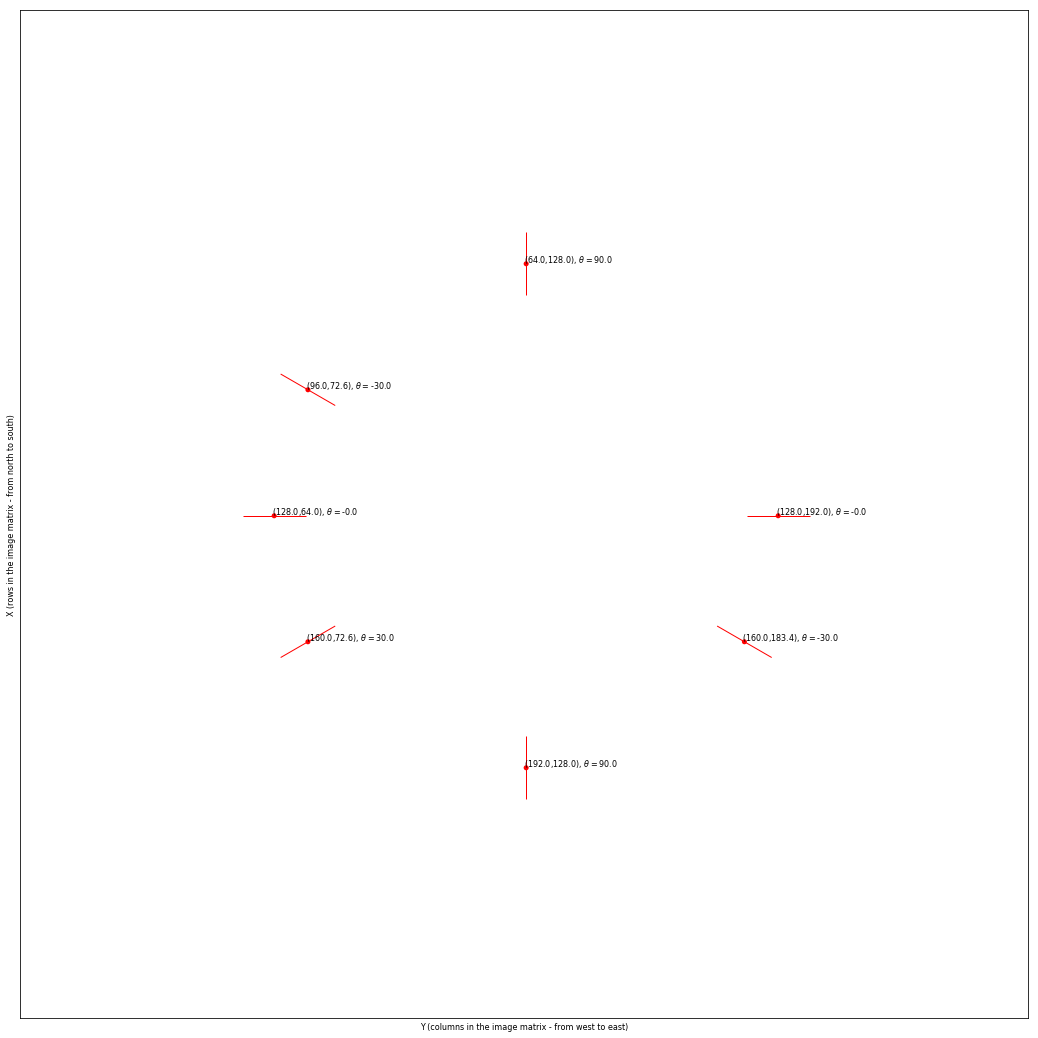

In [6]:
fig, a = mp.show_edges(np.vstack(((X/2. + .5)*mp.pe.N_X, (Y/2. + .5)*mp.pe.N_X, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) )))
t = [a.text(Y_, X_, r'(%0.1f,%0.1f), $\theta=$%0.1f' % (X_, Y_, angle*180/np.pi))  for (X_, Y_, angle)  in zip((X/2. + .5)*mp.pe.N_X, (Y/2. + .5)*mp.pe.N_X, Theta)]
a.set_xlabel('Y (columns in the image matrix - from west to east)')
_ = a.set_ylabel('X (rows in the image matrix - from north to south)')

Overlaying an image :

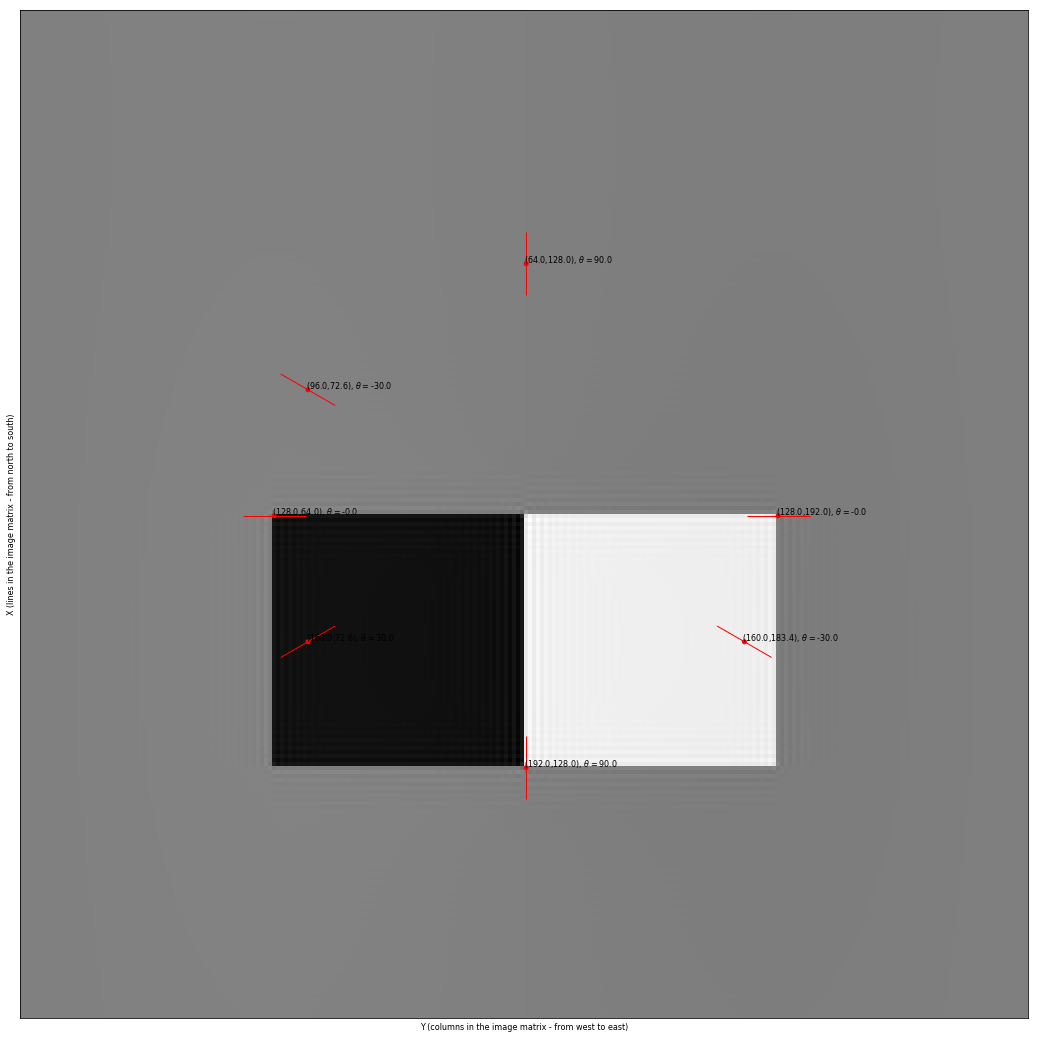

In [7]:
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 128 # number of edges
mp.pe.figsize_edges = 9

#! defining a reference test image (see test_Image)
image = np.zeros((mp.pe.N_X, mp.pe.N_Y))
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4] = 1
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//4:mp.pe.N_X//2] = -1

edges = np.vstack(((X/2. + .5)*mp.pe.N_X, (Y/2. + .5)*mp.pe.N_X, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=image)
#fig, a = mp.show_edges(edges, image=im.whitening(image))
t = [a.text(Y_, X_, r'(%0.1f,%0.1f), $\theta=$%0.1f' % (X_, Y_, angle*180/np.pi))  for (X_, Y_, angle)  in zip((X/2. + .5)*mp.pe.N_X, (Y/2. + .5)*mp.pe.N_X, Theta)]
a.set_xlabel('Y (columns in the image matrix - from west to east)')
_ = a.set_ylabel('X (lines in the image matrix - from north to south)')

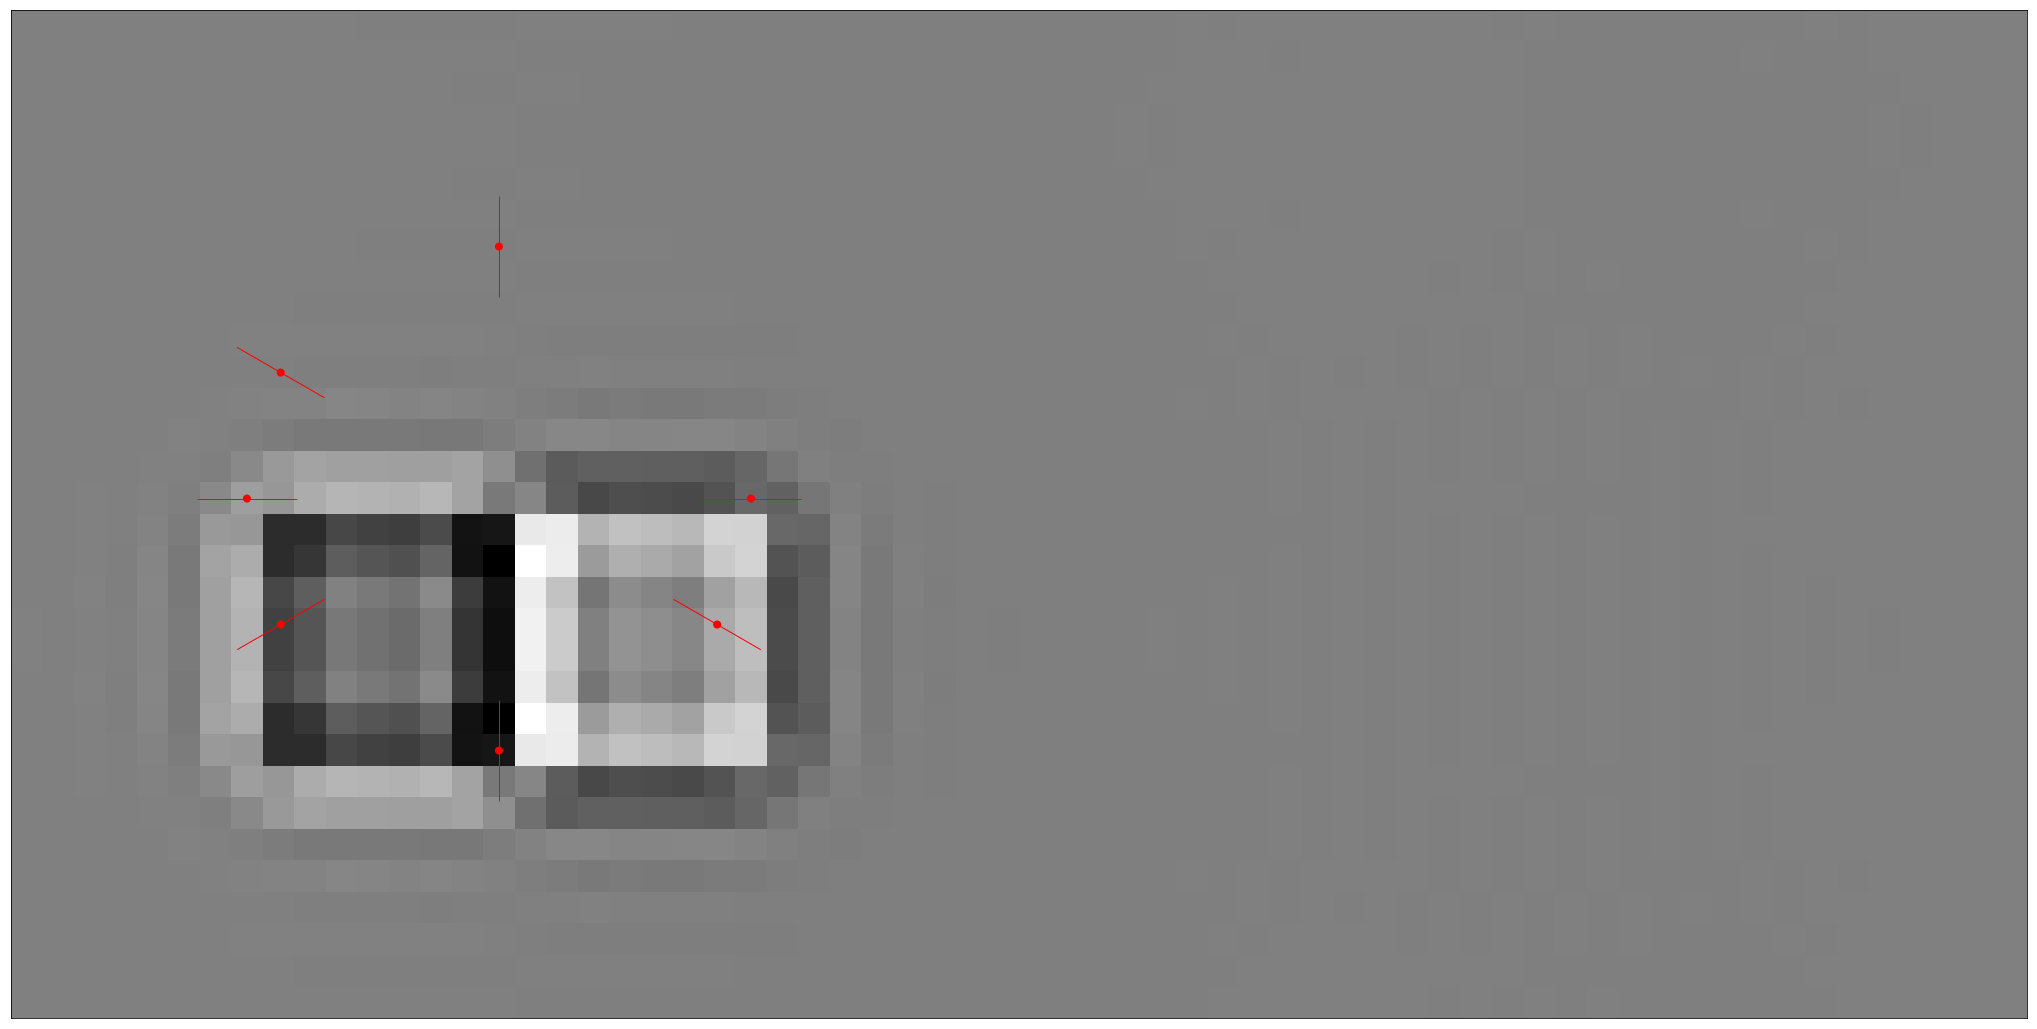

In [8]:
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.set_size((32, 64))
mp.pe.N = 128 # number of edges
mp.pe.figsize_edges = 4.5

#! defining a reference test image (see test_Image)
image = np.zeros((mp.pe.N_X, mp.pe.N_Y))
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4] = 1
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//4:mp.pe.N_X//2] = -1

edges = np.vstack(((X/2. + .5)*mp.pe.N_X-1, (Y/2. + .5)*mp.pe.N_X-1, Theta, .5*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=mp.whitening(image))

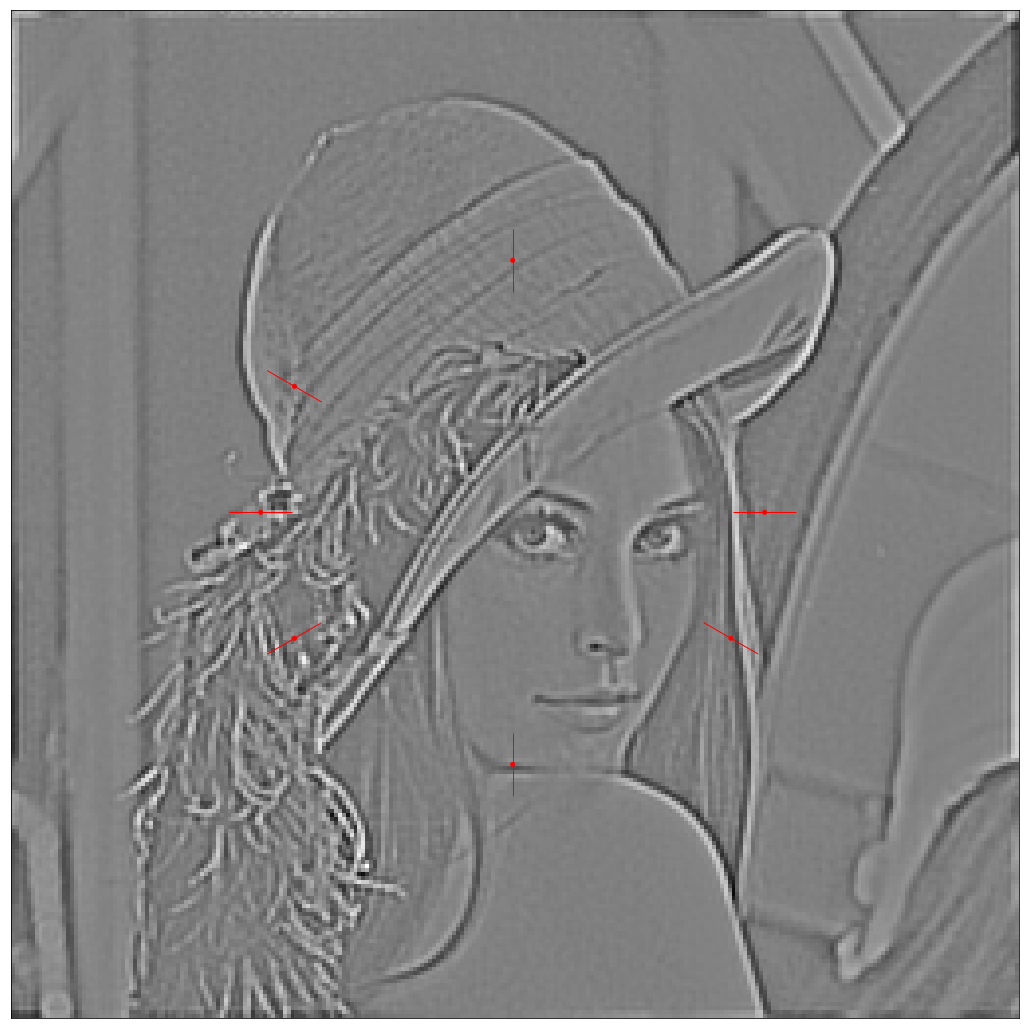

In [9]:
mp.set_size((256, 256))
image = mp.imread('../../SLIP/database/lena256.png')
mp.pe.N = 128 # number of edges
mp.pe.figsize_edges = 9

edges = np.vstack(((X/2. + .5)*mp.pe.N_X-1, (Y/2. + .5)*mp.pe.N_X-1, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=mp.whitening(image))

## Matching Pursuit

### checking basic edge detection

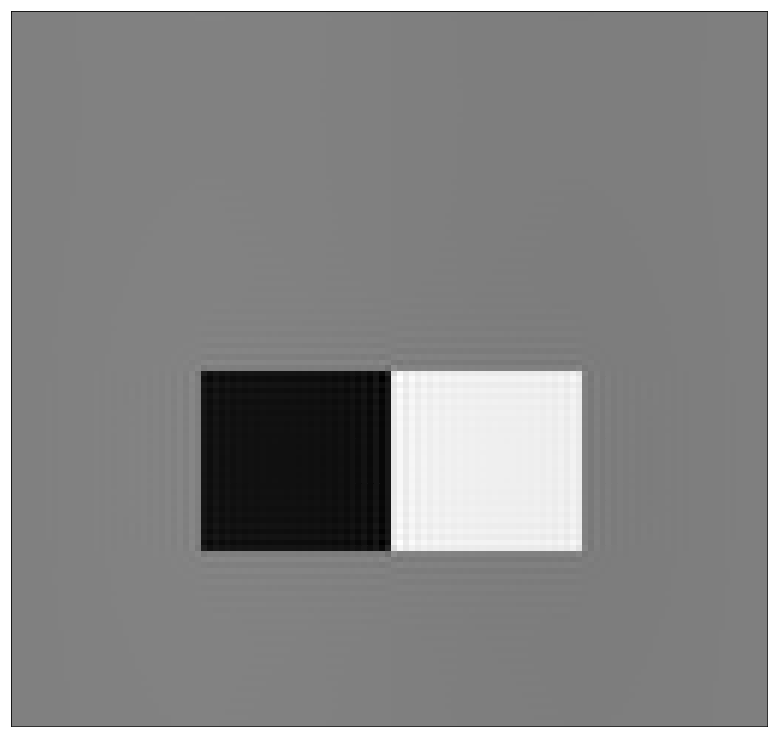

In [10]:
mp.set_size((128, 128))
#! defining a reference test image (see test_Image)
image = np.zeros((mp.pe.N_X, mp.pe.N_Y))
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4] = 1
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//4:mp.pe.N_X//2] = -1
mp.imshow(image);

In [11]:
%%writefile experiment_test_MP.py
import numpy as np
from SparseEdges import SparseEdges

mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 128 # number of edges
mp.pe.figsize_edges = 9

#! defining a reference test image (see test_Image)
image = np.zeros((mp.pe.N_X, mp.pe.N_Y))
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4] = 1
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//4:mp.pe.N_X//2] = -1

import os
matname = os.path.join(mp.pe.matpath, 'experiment_test_MP.npy')
try:
    edges = np.load(matname)
except Exception:
    edges, C_res = mp.run_mp(image, verbose=True)
    try:
        os.mkdir(mp.pe.matpath)
    except Exception:
        pass
    np.save(matname, edges)   


Overwriting experiment_test_MP.py


In [12]:
%run experiment_test_MP.py

Edge  0 / 128  - Max activity  :  5.87936563113  phase=  -53.5388925238  deg,  @  (143, 128, 23, 2)
Edge  1 / 128  - Max activity  :  5.46743080729  phase=  -126.822036028  deg,  @  (165, 127, 23, 2)
Edge  2 / 128  - Max activity  :  4.63849666174  phase=  -51.7629038667  deg,  @  (181, 128, 23, 2)
Edge  3 / 128  - Max activity  :  4.3448828324  phase=  -141.013144692  deg,  @  (133, 127, 23, 1)
Edge  4 / 128  - Max activity  :  4.168928034  phase=  -38.379357341  deg,  @  (154, 128, 23, 1)
Edge  5 / 128  - Max activity  :  2.99327940457  phase=  -80.2874168727  deg,  @  (155, 128, 23, 5)
Edge  6 / 128  - Max activity  :  2.95620175292  phase=  -145.592763908  deg,  @  (173, 127, 23, 1)
Edge  7 / 128  - Max activity  :  2.92721712578  phase=  -126.485142045  deg,  @  (127, 145, 11, 2)
Edge  8 / 128  - Max activity  :  2.92964020311  phase=  53.5148579558  deg,  @  (127, 110, 11, 2)
Edge  9 / 128  - Max activity  :  2.7100279538  phase=  -53.1717108298  deg,  @  (128, 167, 11, 2)
Edge  

Edge  83 / 128  - Max activity  :  0.839321423401  phase=  -66.9594667015  deg,  @  (160, 131, 23, 7)
Edge  84 / 128  - Max activity  :  0.829013776745  phase=  -4.79284578669  deg,  @  (128, 128, 4, 2)
Edge  85 / 128  - Max activity  :  0.787609457377  phase=  6.67559722717  deg,  @  (191, 128, 19, 2)
Edge  86 / 128  - Max activity  :  0.779720011487  phase=  -175.290985666  deg,  @  (191, 127, 3, 2)
Edge  87 / 128  - Max activity  :  0.77645296727  phase=  -127.921066884  deg,  @  (156, 127, 23, 0)
Edge  88 / 128  - Max activity  :  0.775838324741  phase=  16.6176158712  deg,  @  (161, 63, 23, 0)
Edge  89 / 128  - Max activity  :  0.775805827424  phase=  163.389464469  deg,  @  (161, 192, 23, 0)
Edge  90 / 128  - Max activity  :  0.771796720844  phase=  163.368620548  deg,  @  (192, 162, 11, 0)
Edge  91 / 128  - Max activity  :  0.768231173321  phase=  -16.6163967221  deg,  @  (192, 92, 11, 0)
Edge  92 / 128  - Max activity  :  0.763678037245  phase=  159.28130364  deg,  @  (139, 64,

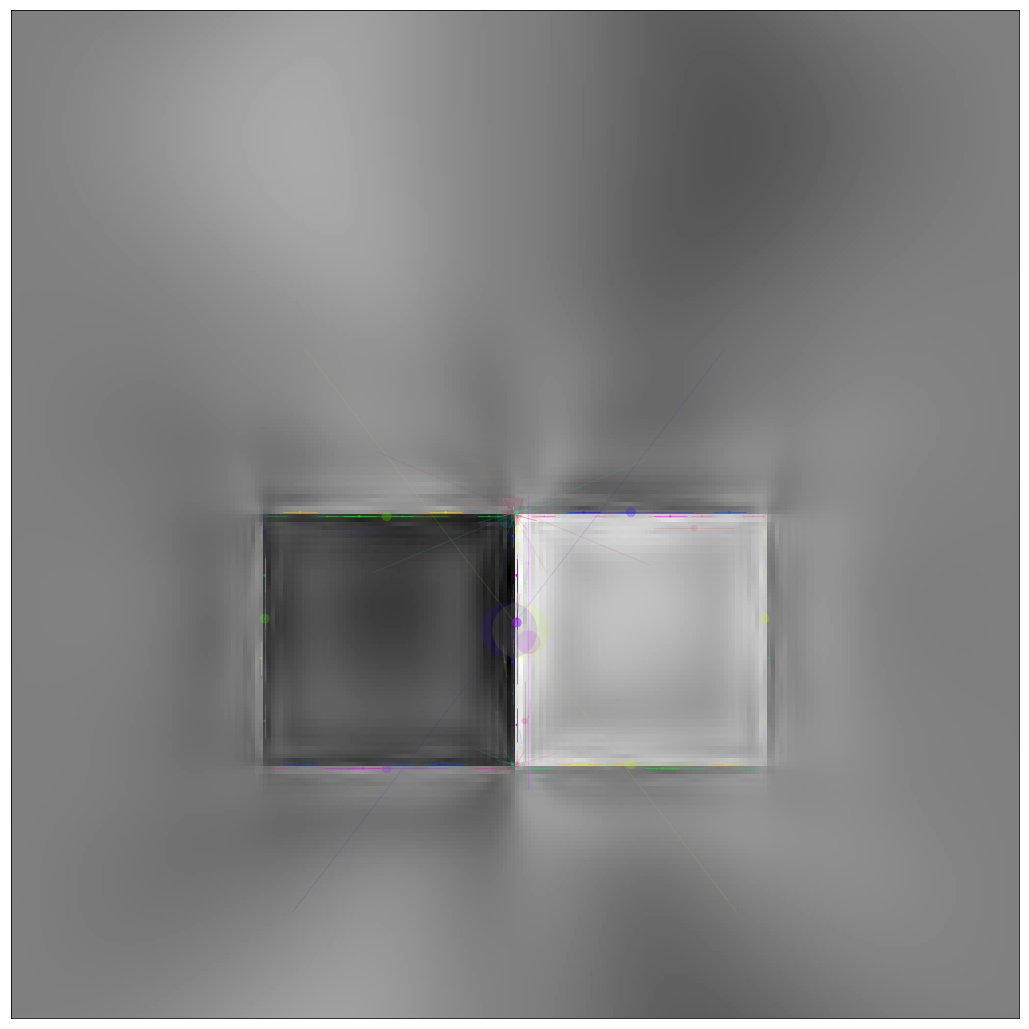

In [13]:
#fig, a = mp.show_edges(edges, image=mp.whitening(image))
fig, a = mp.show_edges(edges, image=mp.dewhitening(mp.reconstruct(edges)))

In [14]:
%%writefile experiment_test_whitening.py
import numpy as np
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 256
mp.pe.MP_alpha = 1
mp.init()


image = mp.imread('https://raw.githubusercontent.com/bicv/SLIP/master/database/serre07_targets/B_N107001.jpg')

#print image.mean(), image.std()
image = mp.normalize(image, center=True)
#print image.mean(), image.std()
import os
matname = os.path.join(mp.pe.matpath, 'experiment_test_whitening.npy')
try:
    edges = np.load(matname)
except Exception:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    


matname_RMSE = os.path.join(mp.pe.matpath, 'experiment_test_whitening_RMSE.npy')
try:
    RMSE = np.load(matname_RMSE)
except Exception:
    RMSE = np.ones(mp.pe.N)
    image_ = image.copy()
    image_rec = np.zeros_like(image_)
    if mp.pe.do_whitening: image_ = mp.whitening(image_)
    for i_N in range(mp.pe.N):
        image_rec += mp.reconstruct(edges[:, i_N][:, np.newaxis])
        RMSE[i_N] =  ((image_*mp.mask-image_rec*mp.mask)**2).sum()

    np.save(matname_RMSE, RMSE)     


Overwriting experiment_test_whitening.py


In [15]:
%run experiment_test_whitening.py

Edge  0 / 256  - Max activity  :  3.69446661617  phase=  89.2188882322  deg,  @  (142, 137, 1, 1)
Edge  1 / 256  - Max activity  :  3.43913084885  phase=  -73.6218771665  deg,  @  (153, 142, 21, 2)
Edge  2 / 256  - Max activity  :  3.3871311699  phase=  -116.643816035  deg,  @  (176, 85, 2, 2)
Edge  3 / 256  - Max activity  :  2.79007894659  phase=  83.9679807066  deg,  @  (149, 118, 8, 2)
Edge  4 / 256  - Max activity  :  2.70882602509  phase=  -113.523132327  deg,  @  (168, 173, 5, 2)
Edge  5 / 256  - Max activity  :  2.5448029633  phase=  -79.0436346311  deg,  @  (183, 134, 21, 2)
Edge  6 / 256  - Max activity  :  2.41648123645  phase=  102.050036257  deg,  @  (137, 97, 6, 2)
Edge  7 / 256  - Max activity  :  2.40045225913  phase=  -113.556253247  deg,  @  (159, 187, 1, 1)
Edge  8 / 256  - Max activity  :  2.35191738181  phase=  -133.999923613  deg,  @  (178, 187, 8, 2)
Edge  9 / 256  - Max activity  :  2.20926880824  phase=  -106.083166686  deg,  @  (157, 164, 4, 2)
Edge  10 / 256 

Edge  83 / 256  - Max activity  :  0.994184839919  phase=  121.90334443  deg,  @  (142, 138, 2, 0)
Edge  84 / 256  - Max activity  :  0.991676364474  phase=  154.414818257  deg,  @  (230, 156, 20, 2)
Edge  85 / 256  - Max activity  :  0.991407899014  phase=  177.775450699  deg,  @  (107, 154, 1, 3)
Edge  86 / 256  - Max activity  :  0.988995991928  phase=  38.7571711439  deg,  @  (199, 81, 1, 1)
Edge  87 / 256  - Max activity  :  0.986186757994  phase=  -130.612619569  deg,  @  (206, 147, 9, 2)
Edge  88 / 256  - Max activity  :  0.985373388202  phase=  -49.7877768084  deg,  @  (139, 134, 0, 1)
Edge  89 / 256  - Max activity  :  0.984725794484  phase=  -61.2684234297  deg,  @  (82, 119, 4, 1)
Edge  90 / 256  - Max activity  :  0.983538125316  phase=  146.25686175  deg,  @  (163, 142, 1, 1)
Edge  91 / 256  - Max activity  :  0.979795222273  phase=  -174.169988619  deg,  @  (160, 163, 22, 1)
Edge  92 / 256  - Max activity  :  0.97959887688  phase=  135.61318904  deg,  @  (118, 156, 11, 2)

Edge  164 / 256  - Max activity  :  0.736705622385  phase=  -137.454419401  deg,  @  (180, 148, 14, 1)
Edge  165 / 256  - Max activity  :  0.73630930501  phase=  45.8934975978  deg,  @  (198, 186, 2, 1)
Edge  166 / 256  - Max activity  :  0.733911385941  phase=  34.1217327821  deg,  @  (113, 189, 14, 1)
Edge  167 / 256  - Max activity  :  0.733264717823  phase=  -41.503983686  deg,  @  (184, 197, 0, 1)
Edge  168 / 256  - Max activity  :  0.727955599773  phase=  -45.4654755423  deg,  @  (107, 162, 3, 1)
Edge  169 / 256  - Max activity  :  0.725072094778  phase=  90.2721100181  deg,  @  (128, 150, 22, 1)
Edge  170 / 256  - Max activity  :  0.724714775304  phase=  90.3389578033  deg,  @  (167, 170, 7, 1)
Edge  171 / 256  - Max activity  :  0.724254189927  phase=  -151.749251334  deg,  @  (87, 211, 10, 2)
Edge  172 / 256  - Max activity  :  0.720728912356  phase=  -40.3350165632  deg,  @  (144, 146, 14, 3)
Edge  173 / 256  - Max activity  :  0.720219249156  phase=  26.5420818298  deg,  @  

Edge  245 / 256  - Max activity  :  0.628370813487  phase=  -44.2839856739  deg,  @  (199, 85, 5, 4)
Edge  246 / 256  - Max activity  :  0.626622858068  phase=  -43.2350812562  deg,  @  (44, 162, 16, 1)
Edge  247 / 256  - Max activity  :  0.62587715301  phase=  -151.723368452  deg,  @  (60, 196, 5, 1)
Edge  248 / 256  - Max activity  :  0.624679940469  phase=  -107.000725721  deg,  @  (109, 206, 0, 4)
Edge  249 / 256  - Max activity  :  0.623071584048  phase=  -148.214678251  deg,  @  (29, 117, 11, 1)
Edge  250 / 256  - Max activity  :  0.621354605548  phase=  106.668099118  deg,  @  (133, 226, 18, 1)
Edge  251 / 256  - Max activity  :  0.621283836366  phase=  12.0445485913  deg,  @  (37, 147, 14, 1)
Edge  252 / 256  - Max activity  :  0.620689622006  phase=  -24.3844050089  deg,  @  (201, 127, 11, 1)
Edge  253 / 256  - Max activity  :  0.620217130534  phase=  -16.2343126974  deg,  @  (138, 216, 12, 2)
Edge  254 / 256  - Max activity  :  0.617793208303  phase=  83.2257288872  deg,  @  

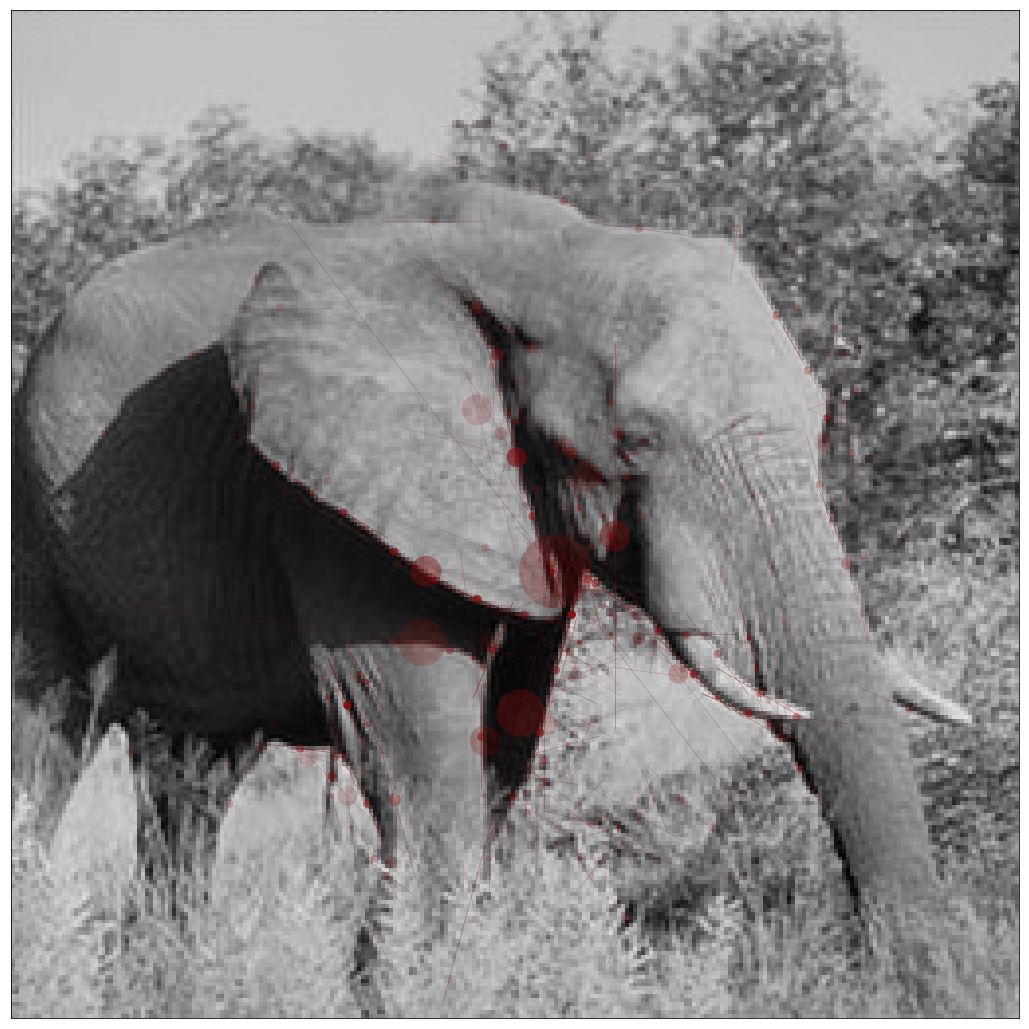

In [16]:
#edges[0, :] = pe.N_X - edges[0,:] # HACK
#edges[2, :] = - edges[2,:] # HACK
#edges[:, 119] = edges[:, 118] # HACK
fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
mp.pe.figsize_edges = .382 * fig_width
fig, a = mp.show_edges(edges, image=image, color='brown', show_phase=False) #, pedestal=.0, gamma=.3
import os
fig.savefig(os.path.join(mp.pe.figpath, 'SparseLets_A.pdf'))

RMSE-W =  0.761261688554


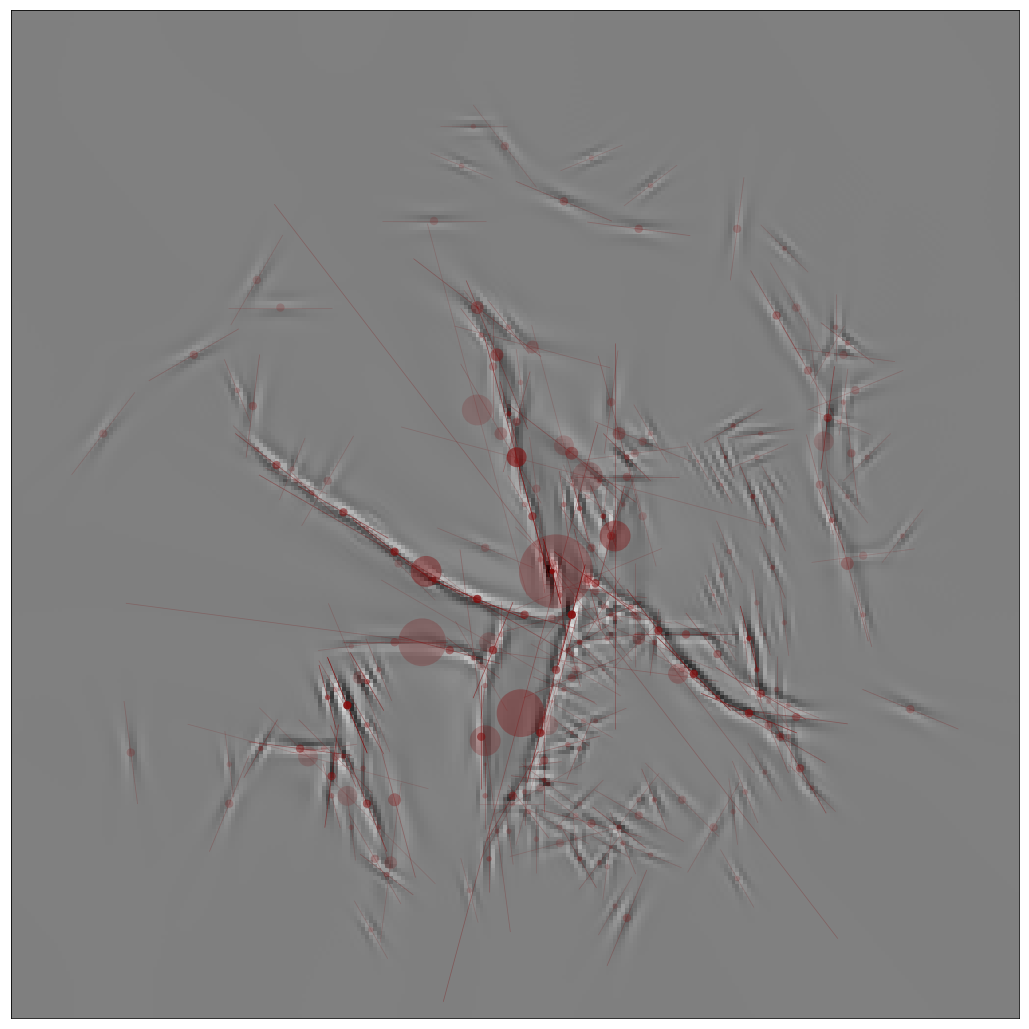

In [17]:
#! recontructing the image from the edges
image_rec = mp.reconstruct(edges)
print('RMSE-W = ', ((mp.whitening(image)-image_rec)**2).sum()/((mp.whitening(image))**2).sum())
fig, a = mp.show_edges(edges, image=image_rec*1., color='brown')

Recontructing the original image by dewhitening the reconstructed image:

RMSE-W =  0.761261688554


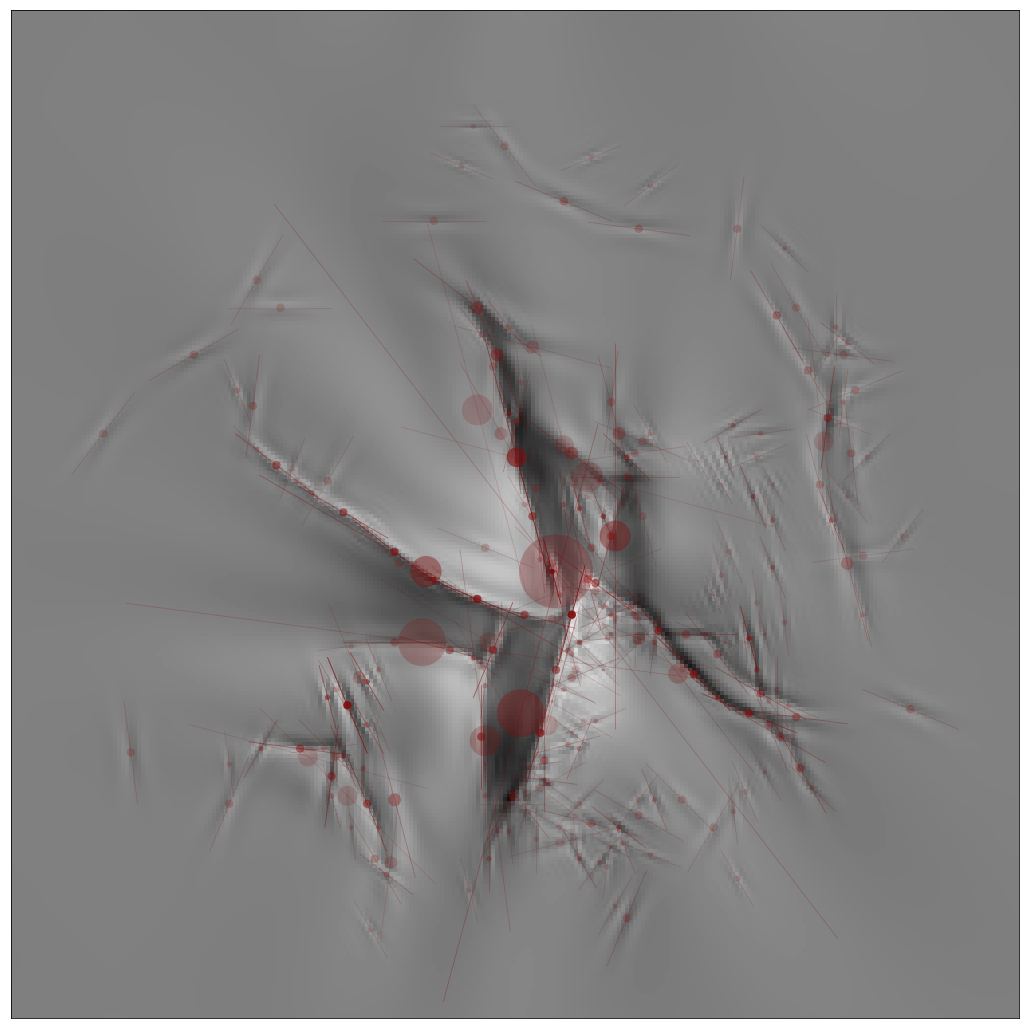

In [18]:
print('RMSE-W = ', ((mp.whitening(image)-image_rec)**2).sum()/((mp.whitening(image))**2).sum())
fig, a = mp.show_edges(edges, image=mp.dewhitening(image_rec)*1., color='brown')

In [19]:
RMSE = np.load(os.path.join(mp.pe.matpath, 'experiment_test_whitening_RMSE.npy'))
print(RMSE.shape, mp.pe.N)

(256,) 256


-5.86499165206e-16 0.183764309115 47.0436631335 24.6506049603
1


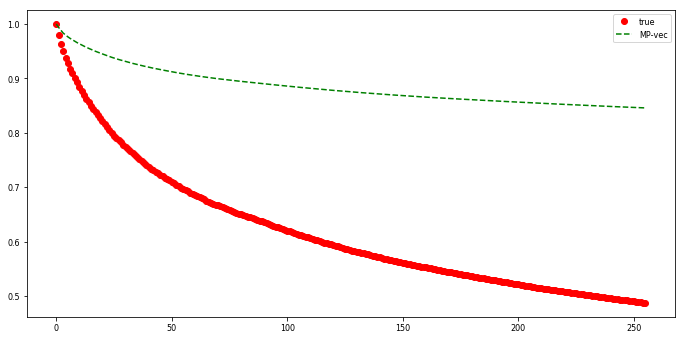

In [20]:
# checking the quick computation of the RMSE in MP
image_W = mp.whitening(image)
RMSE_0 = (image_W**2).sum()
print(image_W.mean(), image_W.std(), np.sqrt(RMSE_0), np.sqrt(RMSE[0]))
print (mp.pe.MP_alpha)    

RMSE_MP = np.ones(mp.pe.N)
RMSE_MP[1:] = 1. - np.cumsum(edges[4, :-1]**2) * (2 -  mp.pe.MP_alpha)/mp.pe.MP_alpha / RMSE_0

plt.figure(figsize=(12,6))
plt.subplot(111)
plt.plot(RMSE/RMSE[0], 'ro', label='true')
plt.plot(RMSE_MP, 'g--', label='MP-vec')
plt.legend()

In [21]:
%%writefile experiment_test_nowhitening.py
import numpy as np
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 256

#image = mp.imread('https://raw.githubusercontent.com/bicv/SLIP/master/database/serre07_targets/B_N107001.jpg')
image = mp.imread('../../SLIP/database/serre07_targets/B_N107001.jpg')


mp.pe.figsize_edges = 9
image = mp.normalize(image, center=True)

#! trying now using no whitening of the image
mp.pe.do_whitening = False

import os
matname = os.path.join(mp.pe.matpath, 'experiment_test_nowhitening.npy')
matname_RMSE = os.path.join(mp.pe.matpath, 'experiment_test_nowhitening_RMSE.npy')
try:
    edges = np.load(matname)
except Exception:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    
    
fig, a = mp.show_edges(edges, image=image, mask=True)

Overwriting experiment_test_nowhitening.py


Edge  0 / 256  - Max activity  :  26.9563634597  phase=  -166.260330078  deg,  @  (152, 105, 13, 10)
Edge  1 / 256  - Max activity  :  20.7087302569  phase=  148.277022112  deg,  @  (139, 80, 6, 9)
Edge  2 / 256  - Max activity  :  17.0181408472  phase=  168.113822108  deg,  @  (135, 57, 1, 10)
Edge  3 / 256  - Max activity  :  16.7601250924  phase=  -150.801038687  deg,  @  (155, 139, 21, 8)
Edge  4 / 256  - Max activity  :  16.4701922681  phase=  -51.8542995469  deg,  @  (144, 139, 4, 7)
Edge  5 / 256  - Max activity  :  13.9172262001  phase=  15.2897218806  deg,  @  (69, 39, 16, 10)
Edge  6 / 256  - Max activity  :  12.4281073381  phase=  122.670796758  deg,  @  (145, 106, 7, 6)
Edge  7 / 256  - Max activity  :  12.3834235413  phase=  -29.3362926619  deg,  @  (99, 190, 4, 9)
Edge  8 / 256  - Max activity  :  10.1640580749  phase=  -122.200905358  deg,  @  (99, 126, 0, 8)
Edge  9 / 256  - Max activity  :  9.86623707528  phase=  162.631083084  deg,  @  (135, 162, 12, 10)
Edge  10 / 25

Edge  83 / 256  - Max activity  :  1.80889304305  phase=  51.319406891  deg,  @  (116, 158, 9, 4)
Edge  84 / 256  - Max activity  :  1.80404349973  phase=  -168.99929663  deg,  @  (195, 81, 22, 3)
Edge  85 / 256  - Max activity  :  1.78803145845  phase=  82.8295277352  deg,  @  (223, 103, 23, 5)
Edge  86 / 256  - Max activity  :  1.77633035332  phase=  -40.8716937852  deg,  @  (196, 131, 20, 5)
Edge  87 / 256  - Max activity  :  1.74045680668  phase=  -71.5868271895  deg,  @  (187, 73, 10, 3)
Edge  88 / 256  - Max activity  :  1.73194302597  phase=  154.040044864  deg,  @  (210, 178, 18, 5)
Edge  89 / 256  - Max activity  :  1.70967929784  phase=  8.56169424204  deg,  @  (177, 197, 9, 3)
Edge  90 / 256  - Max activity  :  1.70585380934  phase=  -57.6192909007  deg,  @  (2, 106, 20, 8)
Edge  91 / 256  - Max activity  :  1.67911607096  phase=  -11.8630022888  deg,  @  (128, 141, 13, 6)
Edge  92 / 256  - Max activity  :  1.67494314046  phase=  47.7734083904  deg,  @  (93, 207, 21, 6)
Edge

Edge  165 / 256  - Max activity  :  1.0269583489  phase=  172.824719405  deg,  @  (159, 146, 14, 2)
Edge  166 / 256  - Max activity  :  1.016866484  phase=  -78.7424969892  deg,  @  (184, 194, 4, 2)
Edge  167 / 256  - Max activity  :  1.01053832012  phase=  65.1062020595  deg,  @  (109, 140, 0, 4)
Edge  168 / 256  - Max activity  :  1.00806848579  phase=  109.421386602  deg,  @  (182, 89, 2, 2)
Edge  169 / 256  - Max activity  :  1.00221371241  phase=  74.5657015874  deg,  @  (72, 118, 5, 4)
Edge  170 / 256  - Max activity  :  0.99860708778  phase=  -27.1334035524  deg,  @  (199, 127, 11, 5)
Edge  171 / 256  - Max activity  :  1.0196572203  phase=  45.0699181066  deg,  @  (201, 154, 7, 5)
Edge  172 / 256  - Max activity  :  0.992483849768  phase=  -19.1971981032  deg,  @  (176, 196, 14, 5)
Edge  173 / 256  - Max activity  :  0.990171075783  phase=  119.063053052  deg,  @  (205, 38, 22, 7)
Edge  174 / 256  - Max activity  :  0.989754829193  phase=  104.099589038  deg,  @  (174, 229, 7, 

Edge  246 / 256  - Max activity  :  0.766820215464  phase=  -151.836739898  deg,  @  (211, 135, 8, 4)
Edge  247 / 256  - Max activity  :  0.76530850468  phase=  -52.0652821203  deg,  @  (223, 99, 3, 7)
Edge  248 / 256  - Max activity  :  0.764198467685  phase=  15.2792797954  deg,  @  (183, 85, 0, 3)
Edge  249 / 256  - Max activity  :  0.761279490018  phase=  -119.883305165  deg,  @  (226, 175, 19, 6)
Edge  250 / 256  - Max activity  :  0.757881597856  phase=  75.2331490702  deg,  @  (196, 111, 20, 4)
Edge  251 / 256  - Max activity  :  0.757051448527  phase=  -31.3575569802  deg,  @  (147, 228, 22, 6)
Edge  252 / 256  - Max activity  :  0.755660676308  phase=  -30.3273714982  deg,  @  (91, 202, 3, 2)
Edge  253 / 256  - Max activity  :  0.755607483329  phase=  25.5087250531  deg,  @  (82, 71, 11, 3)
Edge  254 / 256  - Max activity  :  0.754205765197  phase=  81.8407998622  deg,  @  (118, 2, 23, 5)
Edge  255 / 256  - Max activity  :  0.748441862803  phase=  -76.72971099  deg,  @  (118, 

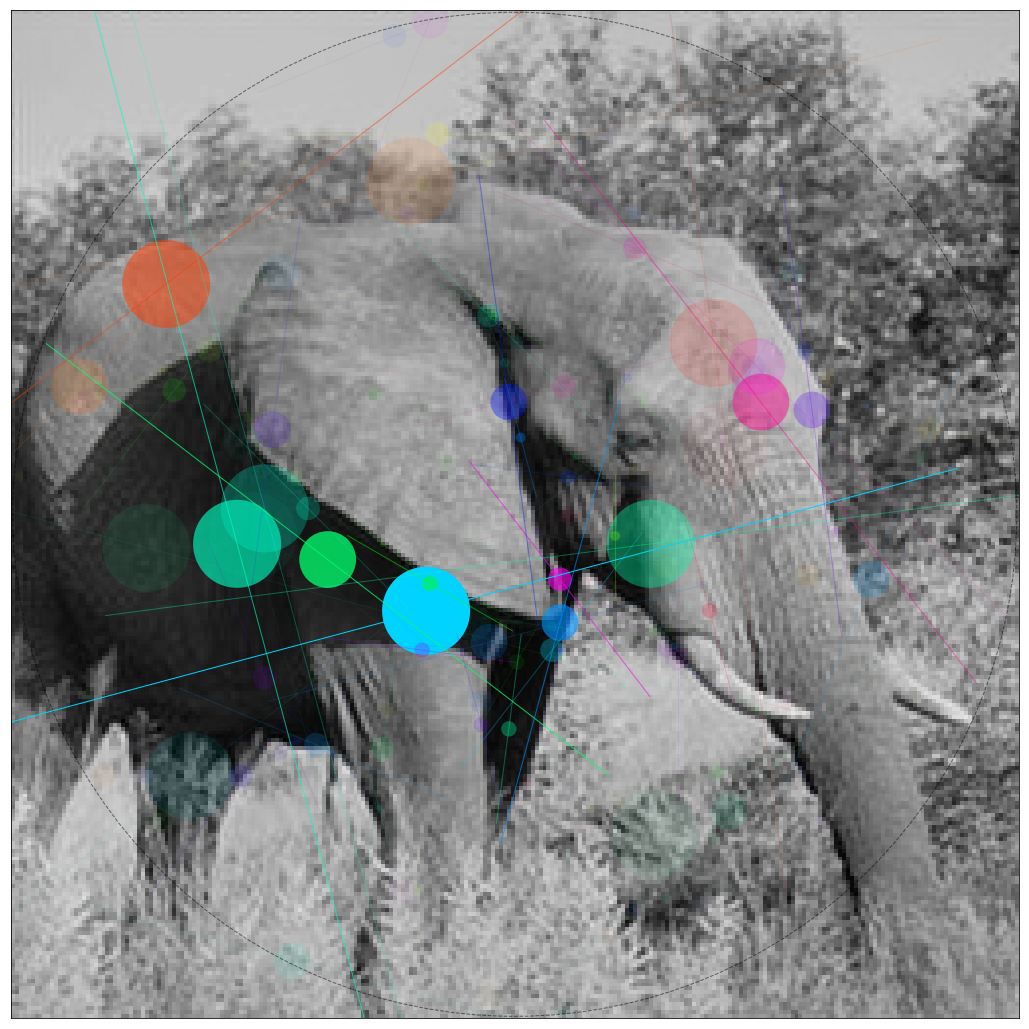

In [22]:
%run experiment_test_nowhitening.py


RMSE =  0.424180925247


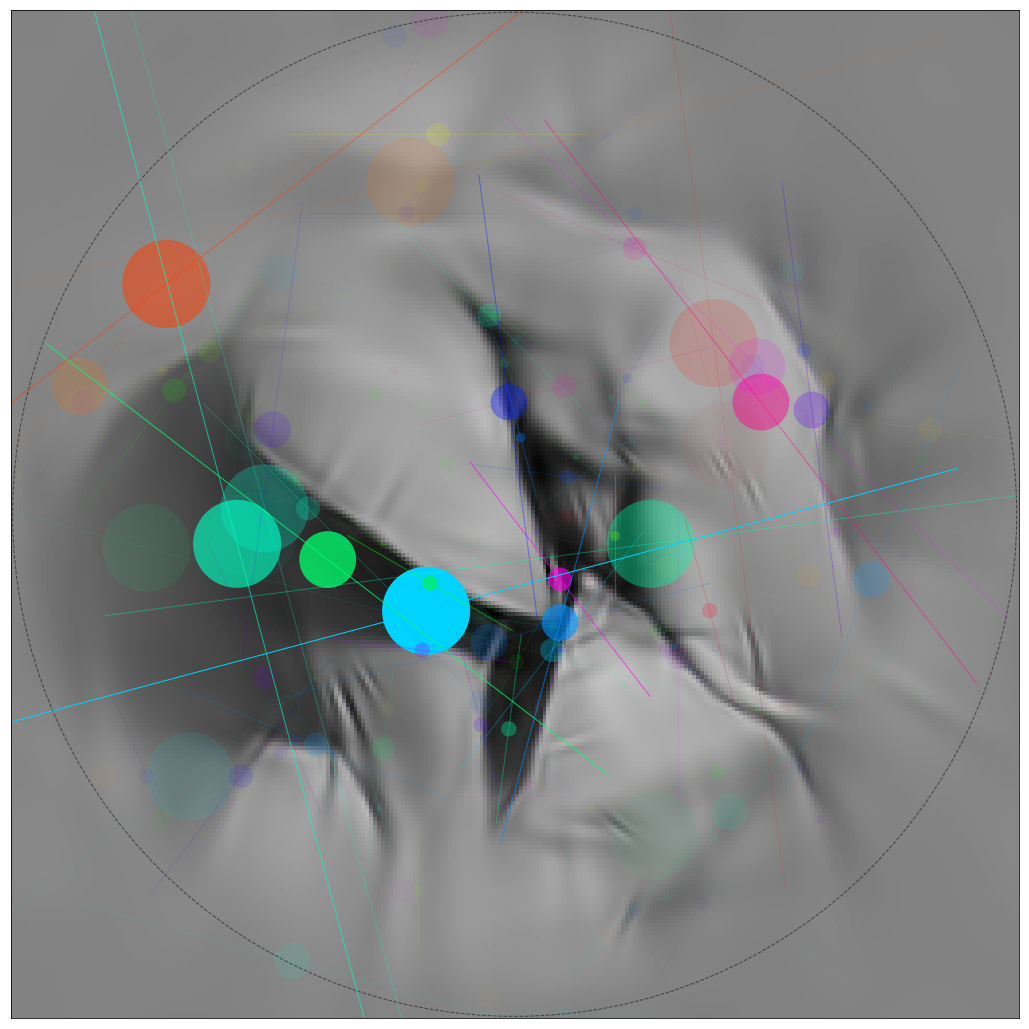

In [23]:
#! recontructing the image from the edges
image_ = mp.reconstruct(edges)
print('RMSE = ', ((image-image_)**2).sum()/((image)**2).sum())
fig, a = mp.show_edges(edges, image=image_*1., mask=True)

### Perspectives: Better fits of the filters

Basically, it is possible to infer the best possible log-Gabor function, even if it's parameters do not fall on the grid

initial_guess : [23, 43, 0.26179938779914935, 0.0088665177314662287] , idx : (23, 43, 13, 9)
popt : [  2.3584e+01   4.2512e+01   2.0944e-01   1.0000e-02] , true :  23.6 42.5 0.20943951023931953 0.01


(0.5, 255.5, 0.5, 255.5)

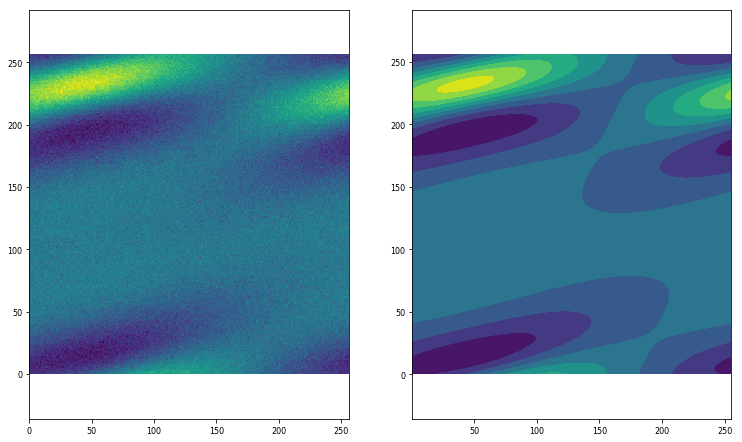

In [24]:
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
import scipy.optimize as opt

def twoD_Gaussian(xy, x_pos, y_pos, theta, sf_0):
    FT_lg = mp.loggabor(x_pos, y_pos, sf_0=np.absolute(sf_0), B_sf=mp.pe.B_sf, theta=theta, B_theta=mp.pe.B_theta)
    return mp.invert(FT_lg).ravel()

# Create x and y indices
x = np.arange(mp.pe.N_X)
y = np.arange(mp.pe.N_Y)
x, y = xy =  np.meshgrid(x, y)

#create data
x_pos, y_pos, theta, sf_0  = 23., 42., 142 * np.pi / 180., .01
x_pos, y_pos, theta, sf_0  = 23.6, 42.5, 12 * np.pi / 180., .01
data = twoD_Gaussian(xy, x_pos, y_pos, theta=theta, sf_0=sf_0)


# plot twoD_Gaussian data generated above
#plt.figure()
#plt.imshow(data.reshape(mp.pe.N_X, mp.pe.N_Y))
#plt.colorbar()

# add some noise to the data and try to fit the data generated beforehand
data_noisy = data + 0.001*np.random.normal(size=data.shape)
# getting best match
C = mp.linear_pyramid(data_noisy.reshape(mp.pe.N_X, mp.pe.N_Y))
idx = mp.argmax(C)
initial_guess = [idx[0], idx[1], mp.theta[idx[2]], mp.sf_0[idx[3]]]
print ('initial_guess :', initial_guess, ', idx :', idx)

popt, pcov = opt.curve_fit(twoD_Gaussian, xy, data_noisy, p0=initial_guess)

data_fitted = twoD_Gaussian(xy, *popt)

extent = (0, mp.pe.N_X, 0, mp.pe.N_Y)
print ('popt :', popt, ', true : ', x_pos, y_pos, theta, sf_0)
fig, axs = plt.subplots(1, 2, figsize=(13, 8))
axs[0].imshow(data_noisy.reshape(mp.pe.N_X, mp.pe.N_Y), cmap=plt.cm.viridis, extent=extent)
_ = axs[1].contourf(data_fitted.reshape(mp.pe.N_X, mp.pe.N_Y), 8, extent=extent, cmap=plt.cm.viridis, origin='upper')
axs[0].axis('equal')
axs[1].axis('equal')

## bonus: generating an unique seed for a given filename

In [25]:
# imagelist, edgeslist, RMSE = mp.process(exp='testing_vanilla', name_database='serre07_distractors')
# take one instance:
# filename, croparea  =  imagelist[0]
filename = 'https://raw.githubusercontent.com/bicv/SLIP/master/database/serre07_targets/B_N107001.jpg'
#print (filename,croparea, filename+str(croparea))
import os
import hashlib
str_ = filename #+ str(croparea)
hashlib.sha224(str_.encode('utf-8')).hexdigest()

'd9dee4e30946f8306a87b83b3a5723e9b9546e114e9f477025090ba2'

In [26]:
int("0x" +  hashlib.sha224((str_).encode('utf-8')).hexdigest(), 0)

22944460602011898315799355141800347746811032983635988259409876290466

In [27]:
np.random.seed(seed=int(int("0x" +  hashlib.sha224(str_.encode('utf-8')).hexdigest(), 0)*1. % 4294967295))

## some book keeping for the notebook

In [28]:
%load_ext watermark
%watermark

2017-10-16T15:37:01+02:00

CPython 3.6.3
IPython 6.2.1

compiler   : GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)
system     : Darwin
release    : 17.0.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [29]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy, pillow, imageio

Software versions
Python 3.6.3 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]
IPython 6.2.1
OS Darwin 17.0.0 x86_64 i386 64bit
numpy 1.13.3
scipy 0.19.1
matplotlib 2.1.0
sympy 1.1.1
pillow 4.3.0
imageio 2.1.2
Mon Oct 16 15:37:04 2017 CEST

In [30]:
%cd -q ../notebooks